### Energy Efficiency Indices for carbon foot printing and as instrument for CO2 emission reduction of inland vessels
Federal Ministry of Transport and Digital Infrastructure, Germany; DST; CESNI 

----------------------------

### The inland EEDI approach includes the attained EEDI and required EEDI for inland waterway navigation, covering 4 representative vessel types and 3 waterway conditions: 
#### four representative vessel types
- dry cargo and container selfpropelled ships
- tankers
- pushed convoys
- passenger ships

#### three waterway conditions: 
- deep calm water (h>7.5m), 
- shallow water with currents (3.5 m <= h <= 7.5 m), 
- cannal: major canals with trapezoidal cross-section, e.g. the MD canal.

#### references
- https://www.cesni.eu/wp-content/uploads/2021/03/cesnipt_energyindex_de.pdf
- https://platina3.eu/download/gernot-paulii-and-jens-ley-on-energy-efficiency-indices-as-an-instrument-for-the-reduction-of-co2-emissions-of-inland-vessels/
- https://link.springer.com/book/10.1007/978-3-030-77325-0 chapter 6.2.4

In [2]:
import math

### attained EEDI
for different vessel types and sailing conditions, use the same EEDI_attained formula with different P_D and V_g  to get the attained EEDI. 

In [11]:
def calculate_attained_EEDI( B, h, vessel_type, DWT, V_g):
    '''
    calculate_attained_EEDI for inland vessels
    vessel type include 1) dry cargo and container selfpropelled ships, 2) tankers, 3) pushed convoys and 4) passenger ships.
   
    Note 
    - the calculation covers waterway conditions of deep calm water and shallow current water, vessel types of dry cargo and container selfpropelled ship, and pushed convoy so far, 
    for the RhineARA case study. Other water conditions and vessel types can be added into calculation when needed.
    
    input
    - CF: CO2 Factor of gasoil, [g CO2/ g diesel] 
    - SFC: Specific fuel consumption, [g diesel/kWh] 
    - P_D: Applied delivered power depending on ship type and sailing direction up-downstream
    - DWT: capacity, [ton]
    - V_g: Velocity over ground, [km/h]
    '''
    def get_P_D( B, h, vessel_type, DWT):
        '''

       Input
        - vessel_type: 1) dry cargo or container selfpropelled ship, 2) tanker, 3) pushed convoy, 4) passenger ship
        - DWT: capacity, [ton]
        - B: ship beam (m)
        - h:  water depth, deep water range h >7.5 m, shallow water 3.5 m <= h <= 7.5 m;  lower than 3.5 m is excluded in the approach

        Note 
        - the calculation covers waterway conditions of deep calm water and shallow current water, vessel types of dry cargo and container selfpropelled ship, and pushed convoy so far, 
        for the RhineARA case study. Other water conditions and vessel types can be added into calculation when needed.

        '''
        if h > 7.5: 
            if vessel_type == "dry cargo" or vessel_type == "container":
                P_D = 0.262 * DWT        
            elif vessel_type == "pushed convoy":
                P_D = (0.146 + 0.25 * math.exp( B / (-11))) * DWT


        elif 3.5 <= h <= 7.5:
            if vessel_type == "dry cargo" or vessel_type == "container":
                P_D = (0.375 + 0.0625 * math.exp(-0.13 * B) - 0.5 * math.exp( h / (-2.8))) * DWT        
            elif vessel_type == "pushed convoy":
                P_D = (0.375 + 0.0625 * math.exp(-0.13 * B) - 0.5 * math.exp( h / (-2.8))) * DWT  # note that the calculations for pushed convoys and self-propelled ships are the same in shallow water!!

        else:
            print ("out of the water depth range or wrong vessel type input")        

        return P_D
    
    
    CF = 3.206 
    SFC = 220 
    
    EEDI_attained = CF * SFC * get_P_D(B, h, vessel_type, DWT) / (DWT * V_g)
    
    return EEDI_attained

In [14]:
EEDI_attained = calculate_attained_EEDI( B = 10, h =4, vessel_type = "container", DWT =3000, V_g=11)
EEDI_attained

17.45395893226047

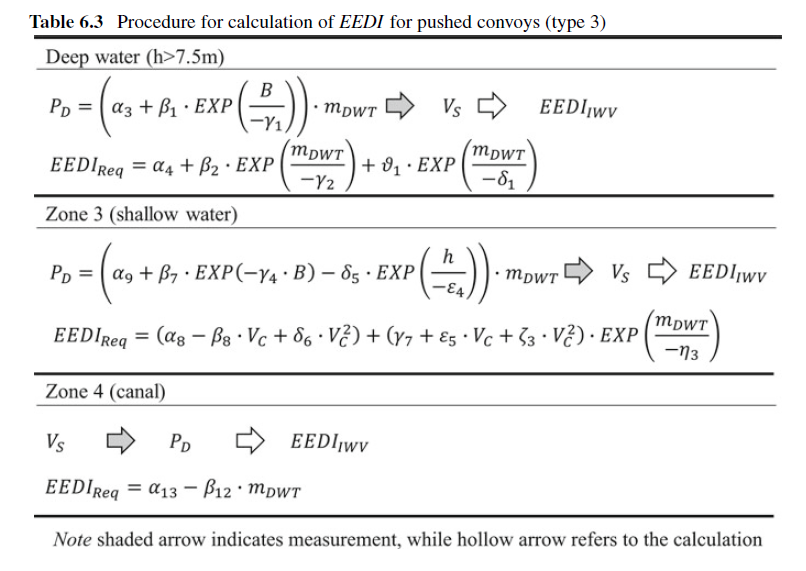

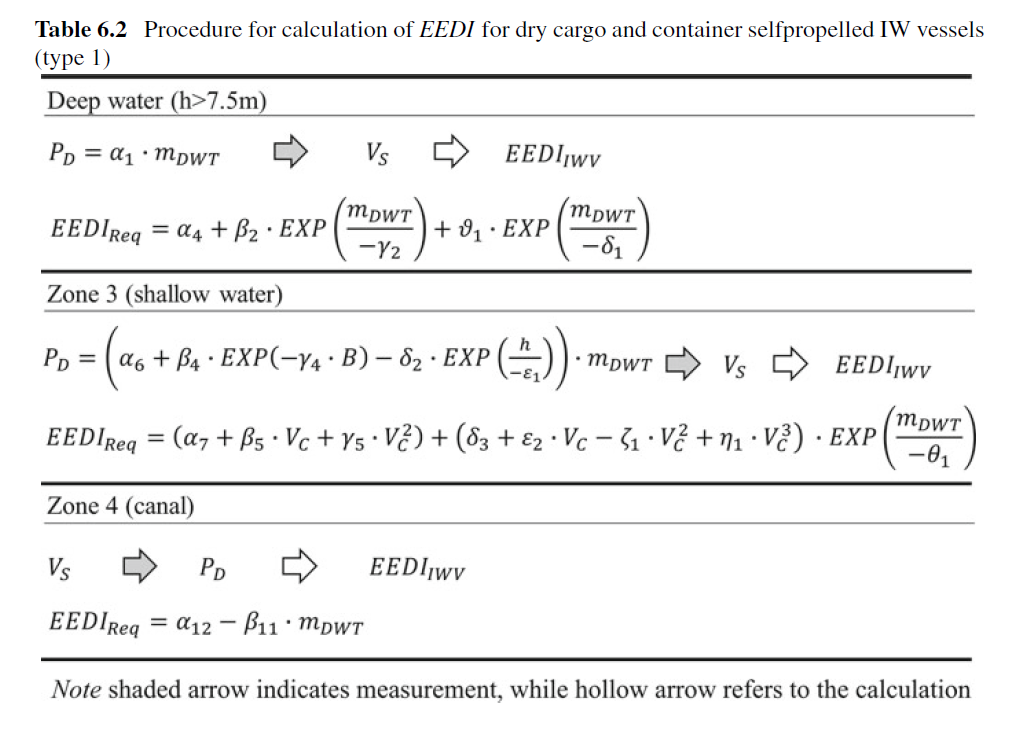

### required EEDI
for different vessel types and sailing conditions, use different EEDI_req formula below to get the required EEDI for each situation

In [ ]:
def calculate_required_EEDI():
    ''' the calculation covers waterway conditions of deep calm water and shallow current water, vessel types of dry cargo and container selfpropelled ship, and pushed convoy so far, 
    for the RhineARA case study. Other water conditions and vessel types can be added into calculation when needed.
    '''
    if 
    
    
    return EEDI_req

##### EEDIIWV = CF · SCF · PD/(VS · mDWT )

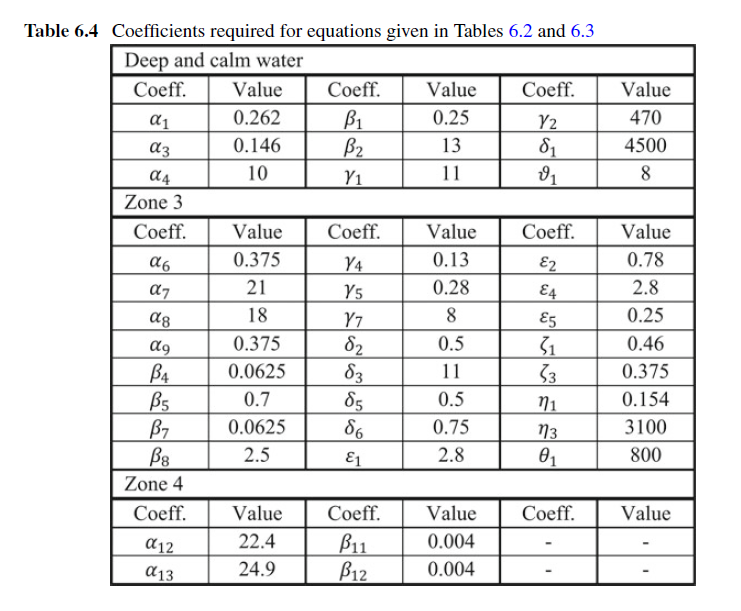